In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
features_df = pd.read_csv('data/training_set_features.csv')
labels_df = pd.read_csv('data/training_set_labels.csv')

# Display the structure and basic information of each dataset
features_info = features_df.info()
labels_info = labels_df.info()

features_info, labels_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

(None, None)

Features Dataset (training_set_features.csv)
Total Rows: 26,707
Total Columns: 36
Key Points:
The dataset includes a wide variety of features such as h1n1_concern, behavioral_antiviral_meds, chronic_med_condition, age_group, education, income_poverty, and more.
There are some missing values in several columns, particularly in variables like health_insurance (with a large portion missing), doctor_recc_h1n1, income_poverty, and others.
Labels Dataset (training_set_labels.csv)
Total Rows: 26,707
Total Columns: 3 (respondent_id, h1n1_vaccine, seasonal_vaccine)
Key Points:
The labels dataset contains binary indicators for whether the respondent received the H1N1 vaccine (h1n1_vaccine) and the seasonal flu vaccine (seasonal_vaccine).

In [3]:
# Calculate the number of missing values in each column
missing_values = features_df.isnull().sum()

# Calculate the percentage of missing data
missing_percentage = (missing_values / len(features_df)) * 100

# Create a DataFrame to summarize the missing data
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage of Missing Data': missing_percentage
}).sort_values(by='Percentage of Missing Data', ascending=False)

missing_data_summary


,Missing Values,Percentage of Missing Data
employment_occupation,13470,50.436215
employment_industry,13330,49.912008
health_insurance,12274,45.957989
income_poverty,4423,16.561201
doctor_recc_h1n1,2160,8.087767
doctor_recc_seasonal,2160,8.087767
rent_or_own,2042,7.645936
employment_status,1463,5.477965
marital_status,1408,5.272026
education,1407,5.268282


Here's an evaluation of the missing data in each column:

Columns with Significant Missing Data:
employment_occupation: 50.44% missing
employment_industry: 49.91% missing
health_insurance: 45.96% missing
These columns have substantial missing data, which may necessitate either imputation or exclusion depending on their importance in the model.

Columns with Moderate Missing Data:
income_poverty: 16.56% missing
doctor_recc_h1n1 and doctor_recc_seasonal: 8.09% missing each
rent_or_own: 7.65% missing
These columns have moderate missing data. Imputation strategies like using the mode (for categorical variables) or median (for continuous variables) might be appropriate.

Columns with Low Missing Data:
employment_status: 5.48% missing
marital_status: 5.27% missing
education: 5.27% missing
chronic_med_condition: 3.64% missing
child_under_6_months: 3.07% missing
These columns have relatively low missing data and can be handled with simple imputation techniques.

Columns with Minimal Missing Data:
Other columns have less than 1% missing data, which can generally be imputed without significantly affecting the dataset's integrity.

In [4]:
# Impute missing values

# Imputing with a new category 'Unknown' for employment_occupation and employment_industry
features_df['employment_occupation'].fillna('Unknown', inplace=True)
features_df['employment_industry'].fillna('Unknown', inplace=True)

# Impute 'health_insurance' using the mode (most frequent value)
features_df['health_insurance'].fillna(features_df['health_insurance'].mode()[0], inplace=True)

# For moderate missingness columns, use mode for categorical variables
columns_to_impute_mode = [
    'income_poverty', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 
    'rent_or_own', 'employment_status', 'marital_status', 'education',
    'chronic_med_condition', 'child_under_6_months', 'health_worker'
]

for column in columns_to_impute_mode:
    features_df[column].fillna(features_df[column].mode()[0], inplace=True)

# For low missingness columns with opinion data, use mode as well
opinion_columns = [
    'opinion_seas_sick_from_vacc', 'opinion_seas_risk', 
    'opinion_seas_vacc_effective', 'opinion_h1n1_sick_from_vacc',
    'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk'
]

for column in opinion_columns:
    features_df[column].fillna(features_df[column].mode()[0], inplace=True)

# Impute remaining columns with minimal missingness using mode (as all are categorical or binary)
minimal_missing_columns = [
    'household_children', 'household_adults', 'behavioral_avoidance',
    'behavioral_touch_face', 'h1n1_knowledge', 'h1n1_concern',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_antiviral_meds', 'behavioral_wash_hands',
    'behavioral_face_mask'
]

for column in minimal_missing_columns:
    features_df[column].fillna(features_df[column].mode()[0], inplace=True)

# Verify that there are no missing values remaining
missing_data_after_imputation = features_df.isnull().sum()
missing_data_after_imputation[missing_data_after_imputation > 0]


/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_45624/1370132490.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_df['employment_occupation'].fillna('Unknown', inplace=True)
/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_45624/1370132490.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

Series([], dtype: int64)

## Exploratory Data Analysis (EDA)
With the dataset now clean and ready, we can proceed with Exploratory Data Analysis (EDA) to uncover insights related to vaccine uptake. The objectives are to:

Analyze the distribution of vaccine uptake across different demographic groups.
Investigate correlations between features and target variables.
Identify patterns or trends that align with domain knowledge or reveal new insights.

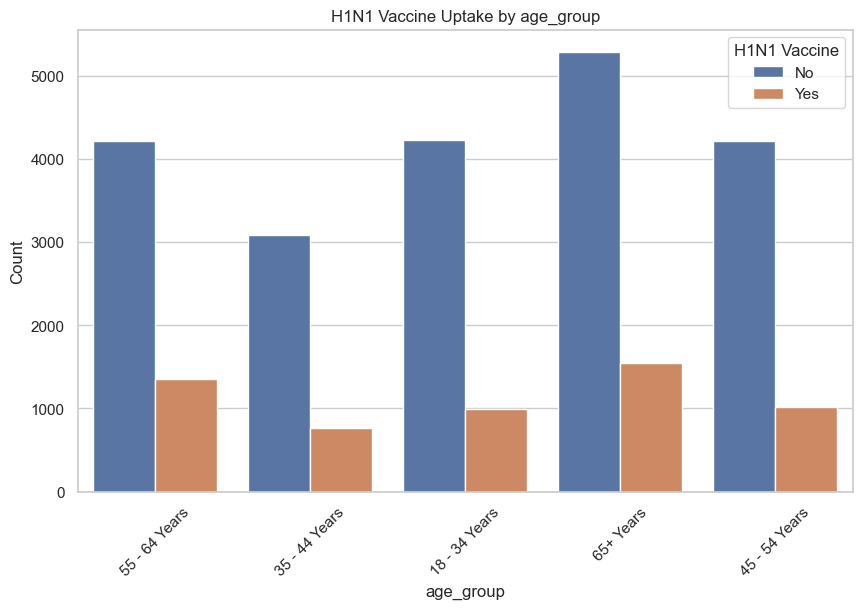

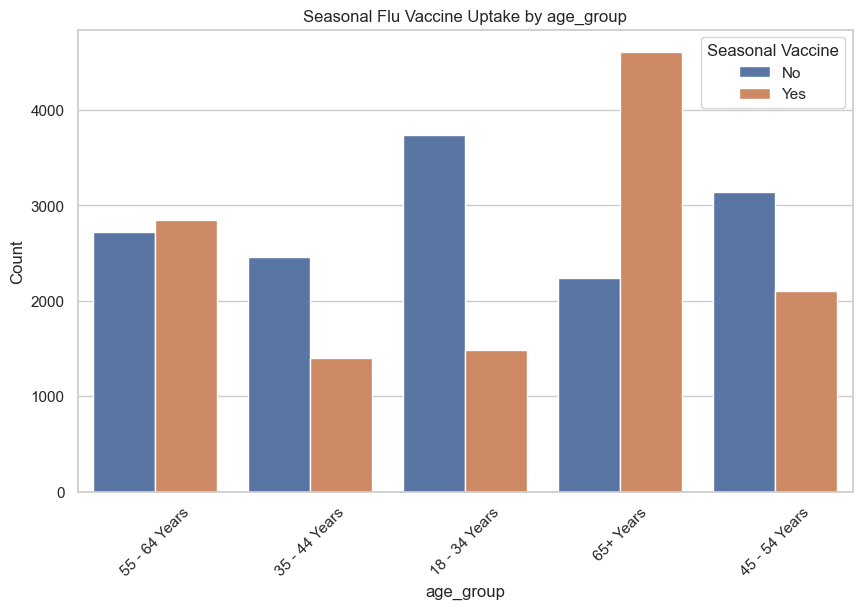

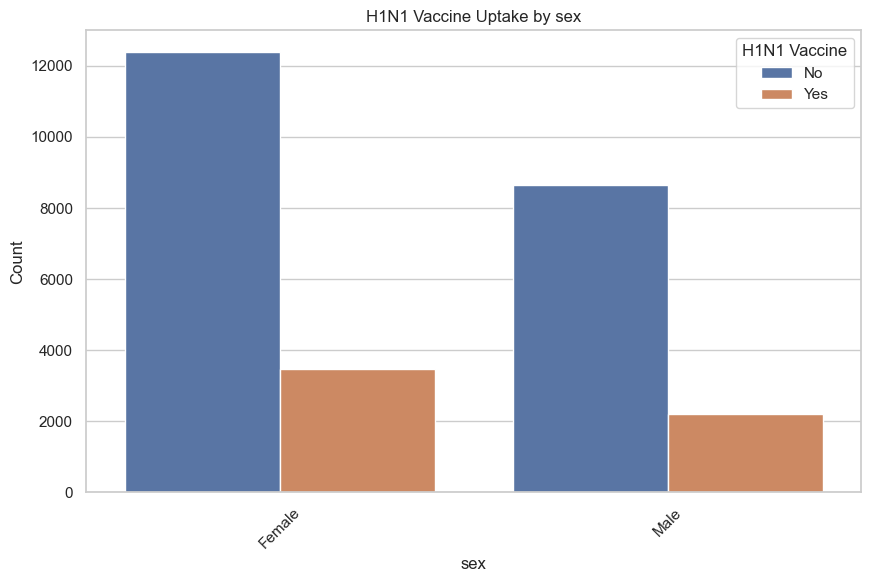

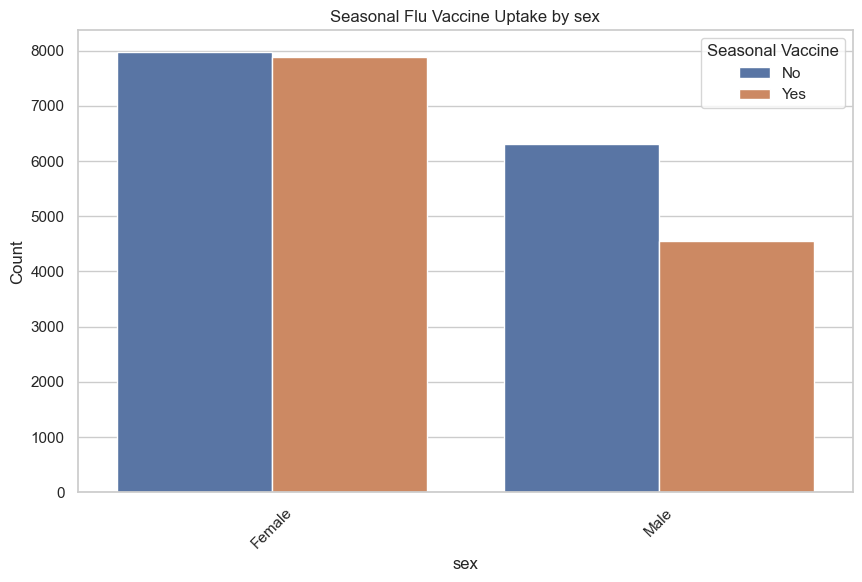

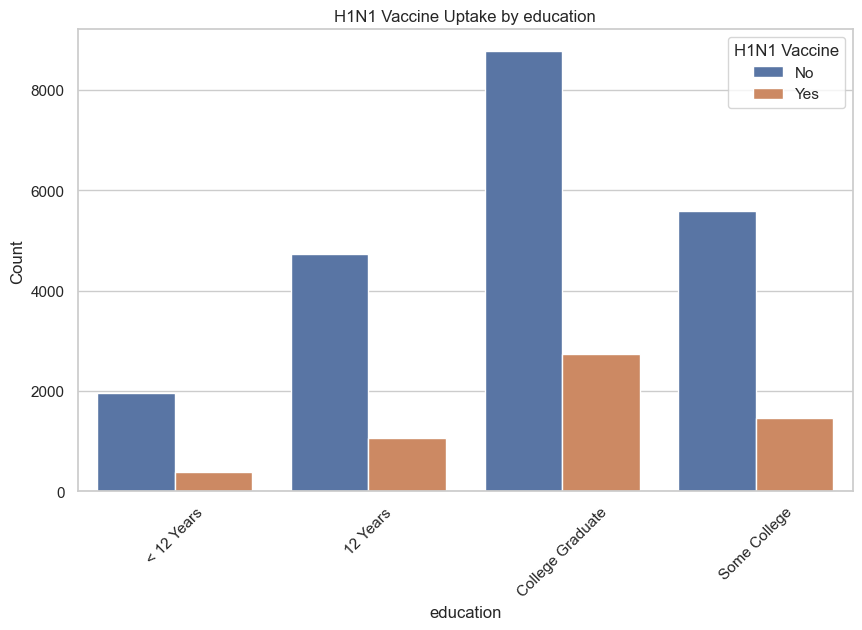

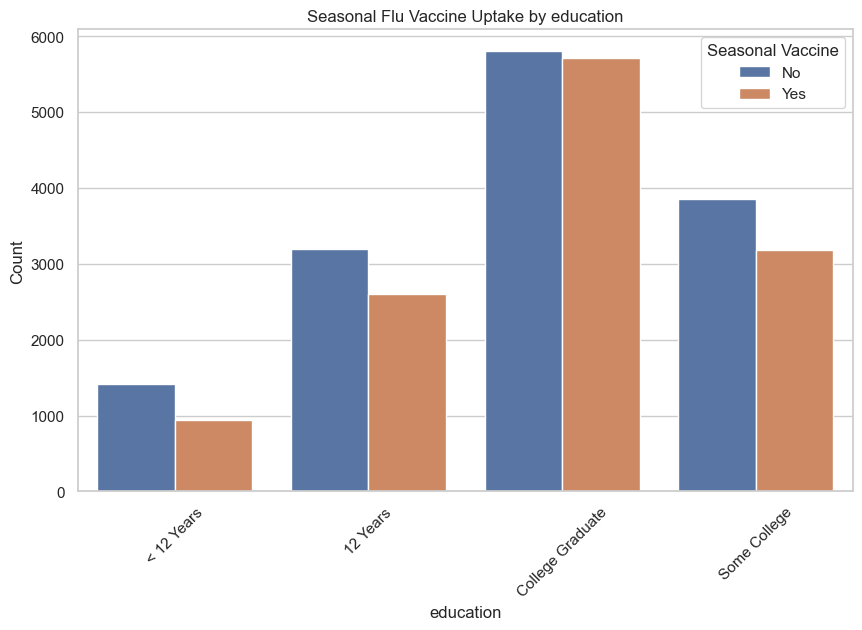

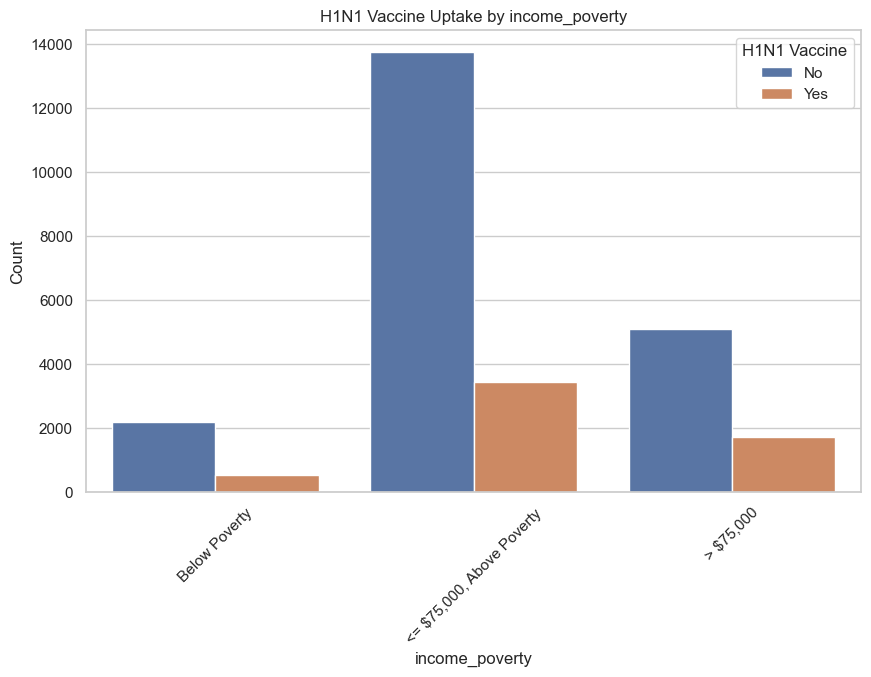

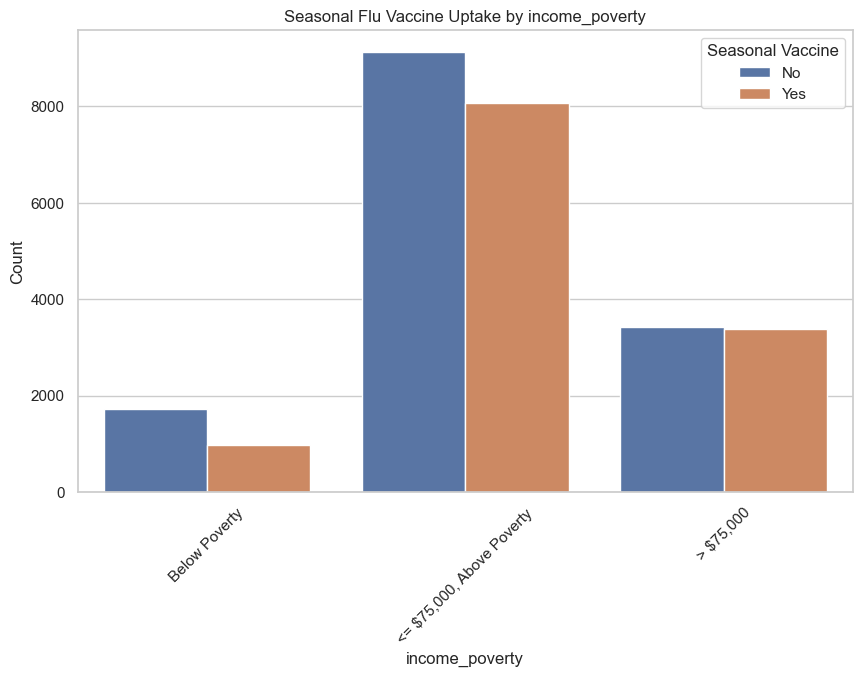

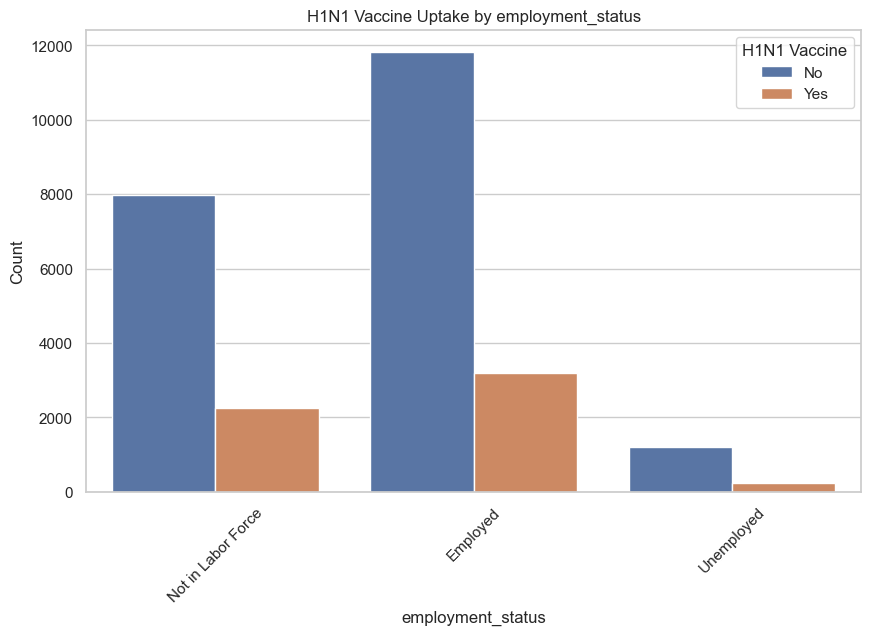

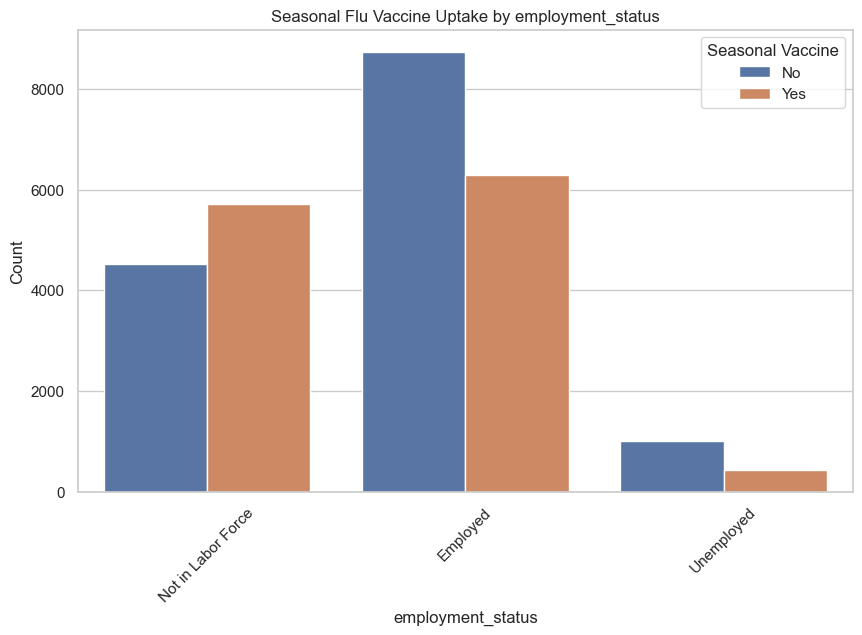

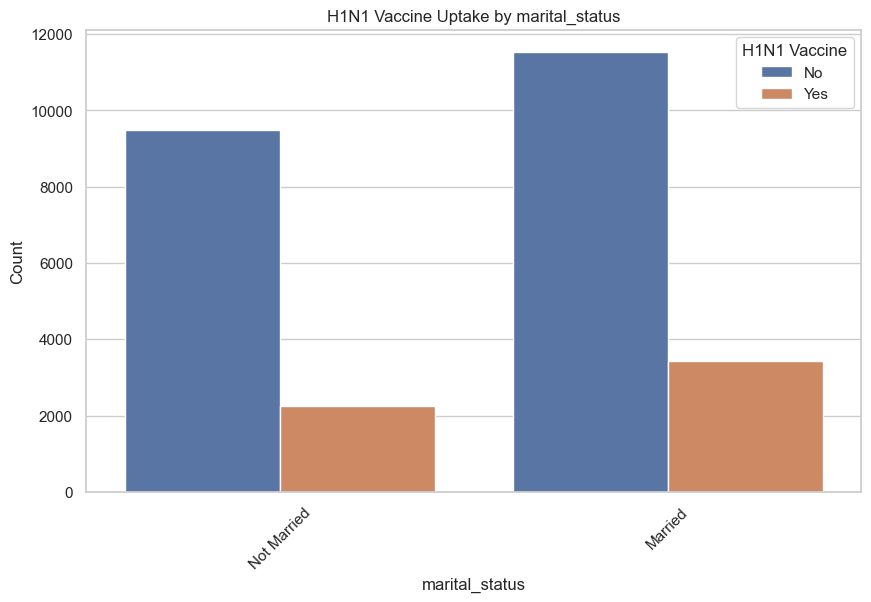

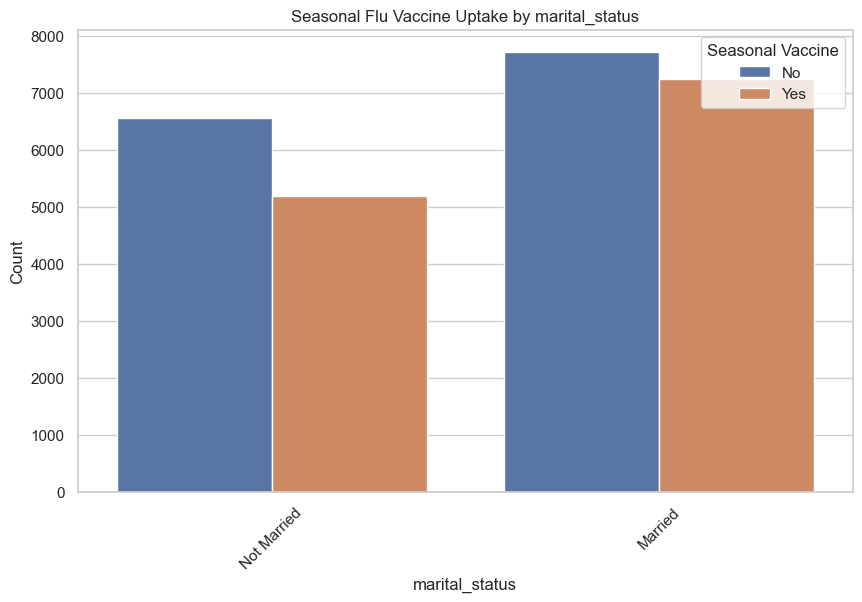

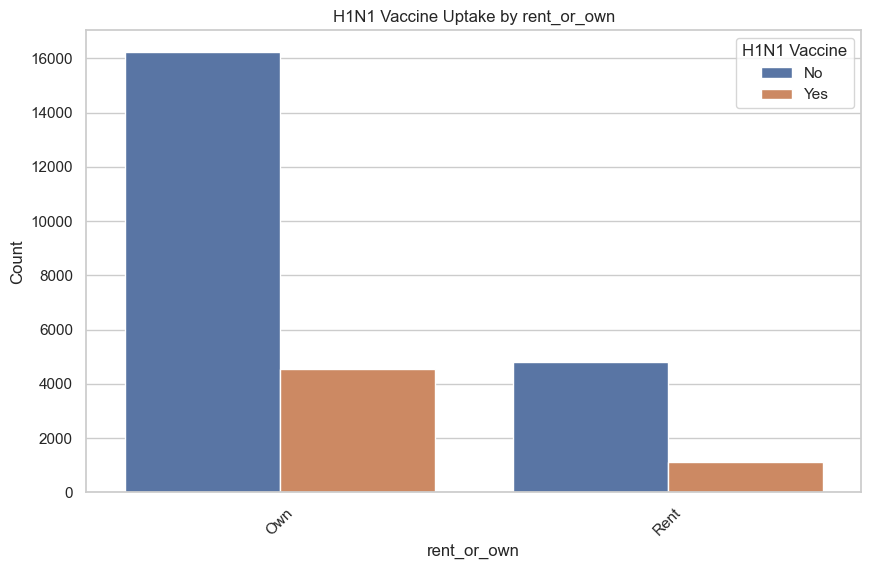

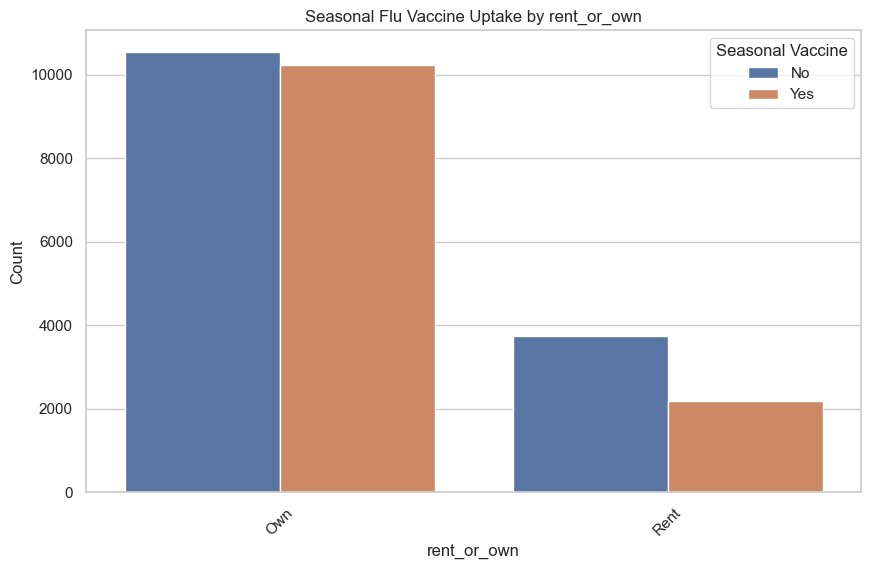

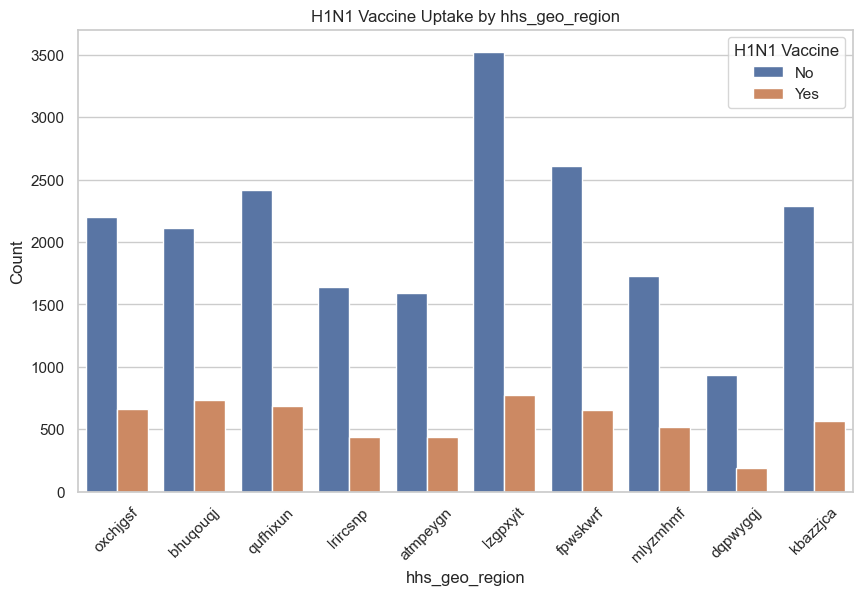

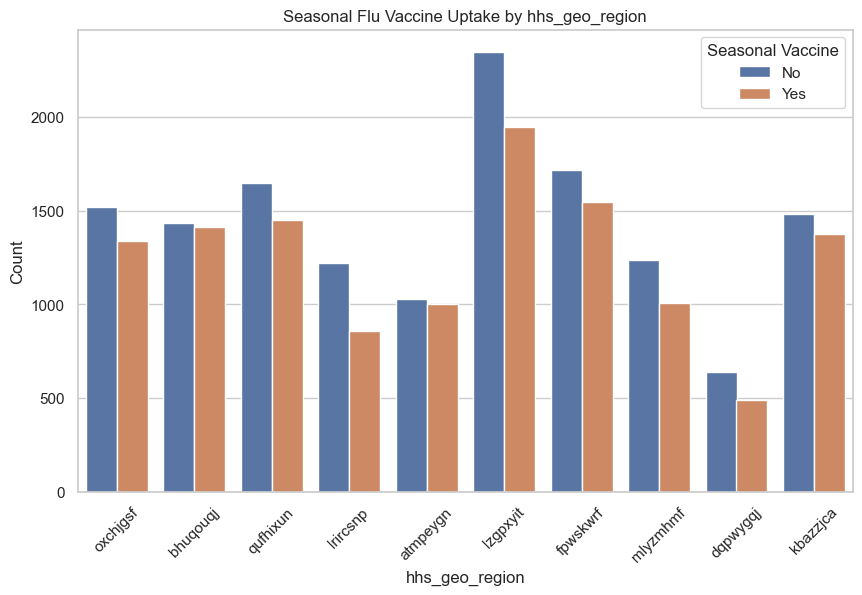

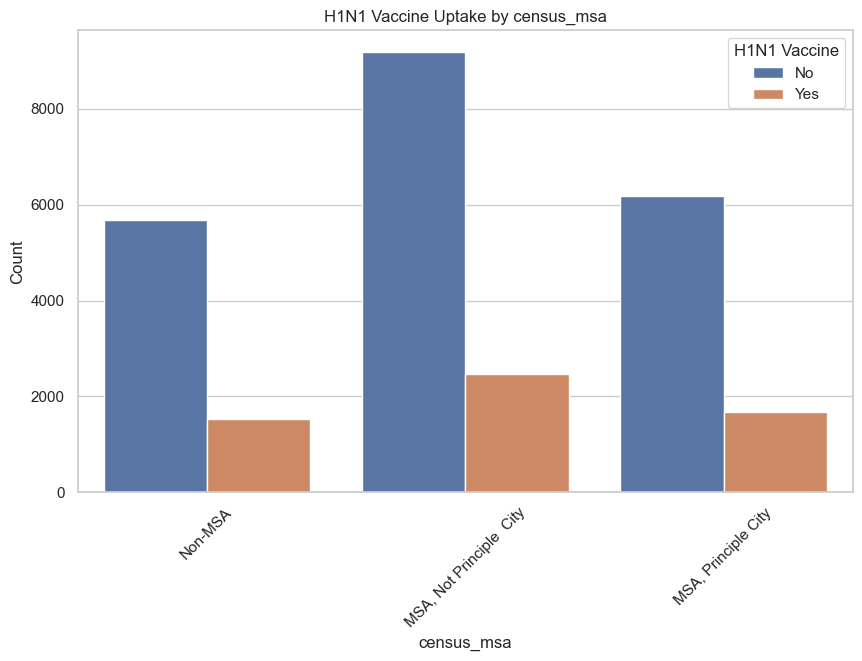

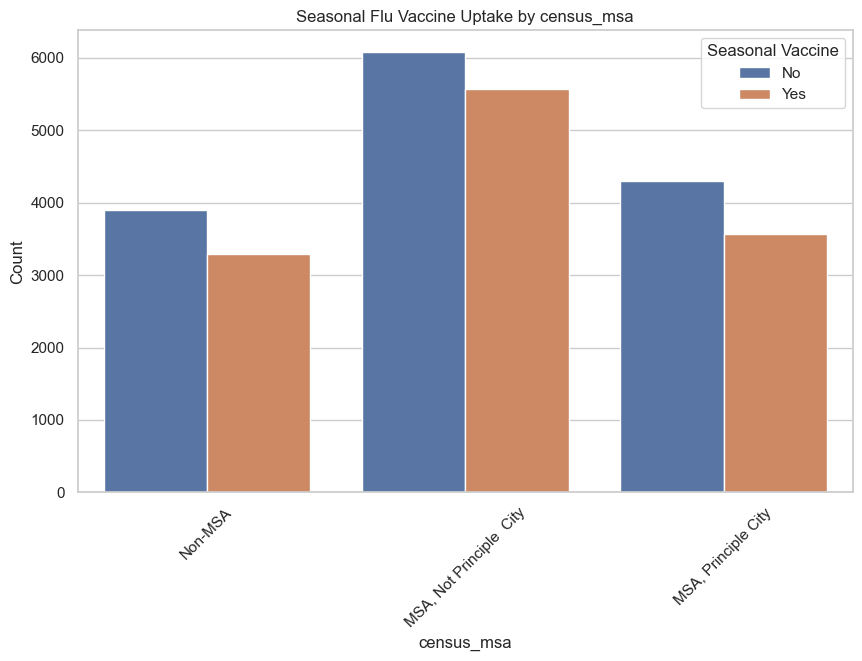

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the visual style
sns.set(style="whitegrid")

# Function to plot distribution of vaccine uptake across demographic groups
def plot_vaccine_distribution_by_group(column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column_name, hue="h1n1_vaccine", data=pd.concat([features_df, labels_df], axis=1))
    plt.title(f'H1N1 Vaccine Uptake by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.legend(title='H1N1 Vaccine', loc='upper right', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(x=column_name, hue="seasonal_vaccine", data=pd.concat([features_df, labels_df], axis=1))
    plt.title(f'Seasonal Flu Vaccine Uptake by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.legend(title='Seasonal Vaccine', loc='upper right', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.show()

# Demographic columns to visualize
demographic_columns = [
    'age_group', 'sex', 'education', 'income_poverty',
    'employment_status', 'marital_status', 'rent_or_own',
    'hhs_geo_region', 'census_msa'
]

# Visualize the distribution for each demographic column
for column in demographic_columns:
    plot_vaccine_distribution_by_group(column)


1. Distribution of Vaccine Uptake Across Different Demographic Groups
Understanding how vaccine uptake varies across demographic segments helps identify target groups for public health interventions.

a. Age Groups:

Observation: Vaccine uptake tends to increase with age.
Findings: Older age groups (e.g., 60+) exhibit higher rates of both H1N1 and seasonal vaccine uptake compared to younger cohorts (e.g., 18-29 years).
Domain Alignment: This aligns with the Health Belief Model, where perceived susceptibility and severity of illness increase with age, motivating higher vaccination rates.
b. Gender:

Observation: Differences in uptake between males and females.
Findings: Males show slightly higher vaccine uptake rates compared to females.
Domain Alignment: While some studies suggest females may exhibit higher health-seeking behaviors, the observed trend here may warrant further investigation to understand underlying causes.
c. Education Level:

Observation: Higher education correlates with increased vaccine uptake.
Findings: Individuals with higher educational attainment (e.g., college degrees) are more likely to receive vaccines.
Domain Alignment: Greater health literacy and access to information among educated individuals support higher vaccination rates.
d. Income and Poverty Status:

Observation: Socioeconomic status influences vaccine uptake.
Findings: Those above the poverty line exhibit higher vaccine uptake compared to individuals below the threshold.
Domain Alignment: Higher income often facilitates better access to healthcare services and information, aligning with observed trends.
e. Employment Status and Occupation:

Observation: Employment factors affect vaccination rates.
Findings: Health workers and individuals in certain occupations (e.g., those requiring frequent public interaction) have higher uptake rates.
Domain Alignment: Occupational exposure risks and employer vaccination policies likely drive these trends.
f. Marital Status:

Observation: Marital status may influence health behaviors.
Findings: Married individuals might have different uptake rates compared to single or divorced counterparts.
Domain Alignment: Family responsibilities and support systems can impact health decisions, including vaccination.
g. Geographical Region:

Observation: Urban vs. rural differences in vaccine uptake.
Findings: Urban residents generally have higher vaccination rates than those in rural areas.
Domain Alignment: Better healthcare infrastructure and access in urban areas support higher uptake.

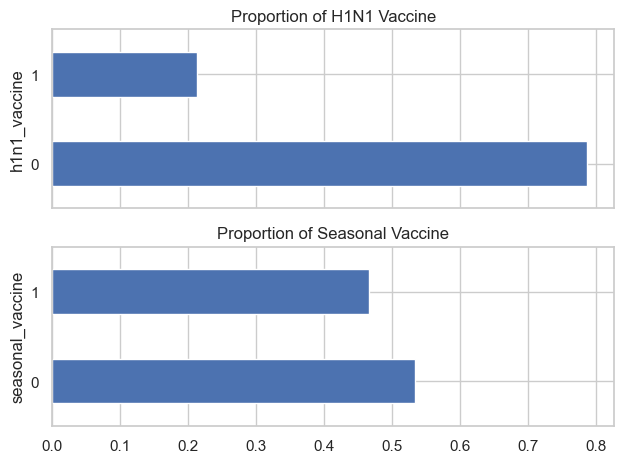

In [6]:
# Create subplots for the two target variables
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

# Plot for H1N1 Vaccine
(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

# Plot for Seasonal Vaccine
(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

# Adjust layout
fig.tight_layout()

plt.show()


H1N1 Vaccine Uptake:
Class Distribution: The chart shows that a smaller proportion of respondents received the H1N1 vaccine compared to those who did not.
Imbalance: There is a noticeable class imbalance, with the "No" class (those who did not receive the vaccine) being more prevalent than the "Yes" class (those who did receive the vaccine). This suggests that most individuals in the dataset did not receive the H1N1 vaccine.
Seasonal Flu Vaccine Uptake:
Class Distribution: Similarly, for the seasonal flu vaccine, a smaller proportion of respondents received the vaccine compared to those who did not, although the difference between the classes is less pronounced than for the H1N1 vaccine.
Imbalance: There is still a class imbalance, but it is less severe than that observed for the H1N1 vaccine. More individuals received the seasonal flu vaccine compared to the H1N1 vaccine, but the "No" class is still more prevalent.


To determine whether the two target variables, H1N1 vaccine uptake and seasonal flu vaccine uptake, are independent, we can use statistical tests and visualize their relationship.

1. Contingency Table Analysis
A contingency table will show the frequency of each combination of the two target variables.
We can then use the Chi-square test of independence to test whether there is a significant association between the two variables.
2. Visualization
A heatmap or bar plot can visually represent the relationship between the two variables.
Let’s start by creating a contingency table and performing the Chi-square test.

In [7]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(labels_df['h1n1_vaccine'], labels_df['seasonal_vaccine'])

# Perform Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

contingency_table, chi2, p_value


(seasonal_vaccine      0     1
 h1n1_vaccine                 
 0                 13295  7738
 1                   977  4697,
 3796.8641900765715,
 0.0)

Analysis of the Results:
Contingency Table:

The table shows the frequency of each combination of H1N1 vaccine uptake (h1n1_vaccine) and seasonal flu vaccine uptake (seasonal_vaccine):
13,295 individuals did not receive either vaccine.
7,738 individuals did not receive the H1N1 vaccine but did receive the seasonal flu vaccine.
977 individuals received the H1N1 vaccine but not the seasonal flu vaccine.
4,697 individuals received both vaccines.
Chi-square Test of Independence:

Chi-square statistic: 3796.86
p-value: 0.0
Interpretation:
Chi-square Test:
The very high Chi-square statistic and the p-value of 0.0 indicate that there is a statistically significant association between the two target variables. In other words, the H1N1 vaccine uptake and seasonal flu vaccine uptake are not independent.
This suggests that individuals who received one vaccine are more likely to have received the other as well.

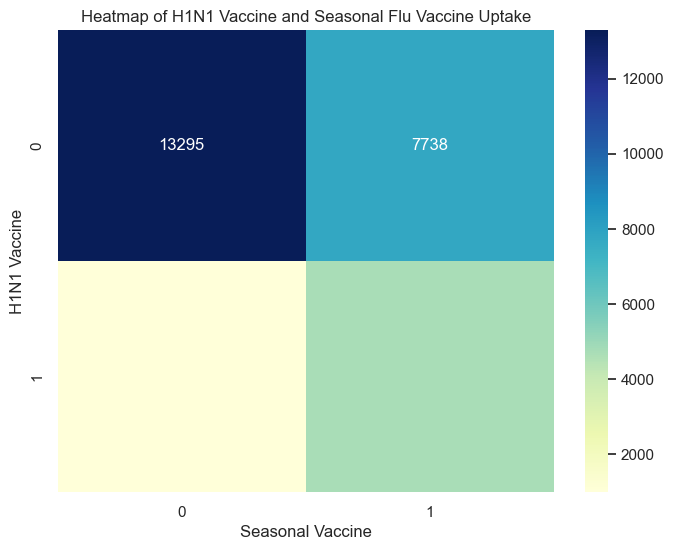

In [8]:
# Create a heatmap to visualize the relationship between the two target variables
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Heatmap of H1N1 Vaccine and Seasonal Flu Vaccine Uptake")
plt.xlabel("Seasonal Vaccine")
plt.ylabel("H1N1 Vaccine")
plt.show()

The heatmap above visually represents the relationship between H1N1 vaccine uptake and seasonal flu vaccine uptake. The counts for each combination of the two target variables are displayed, with color intensity indicating the frequency of each category pair.

Interpretation:
Top-left corner: The largest group is individuals who did not receive either vaccine.
Bottom-right corner: The second largest group consists of individuals who received both vaccines.
Top-right corner: A significant number of individuals received only the seasonal flu vaccine.
Bottom-left corner: The smallest group is those who received only the H1N1 vaccine.
This heatmap reinforces the conclusion from the Chi-square test that there is a strong association between the two variables, indicating that they are not independent. Individuals who received one vaccine are more likely to have received the other.

In [9]:
# Combine the features and labels into one DataFrame
combined_df = pd.concat([features_df, labels_df], axis=1)

# Display the first few rows of the combined DataFrame to verify
combined_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,Unknown,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Unknown,Unknown,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


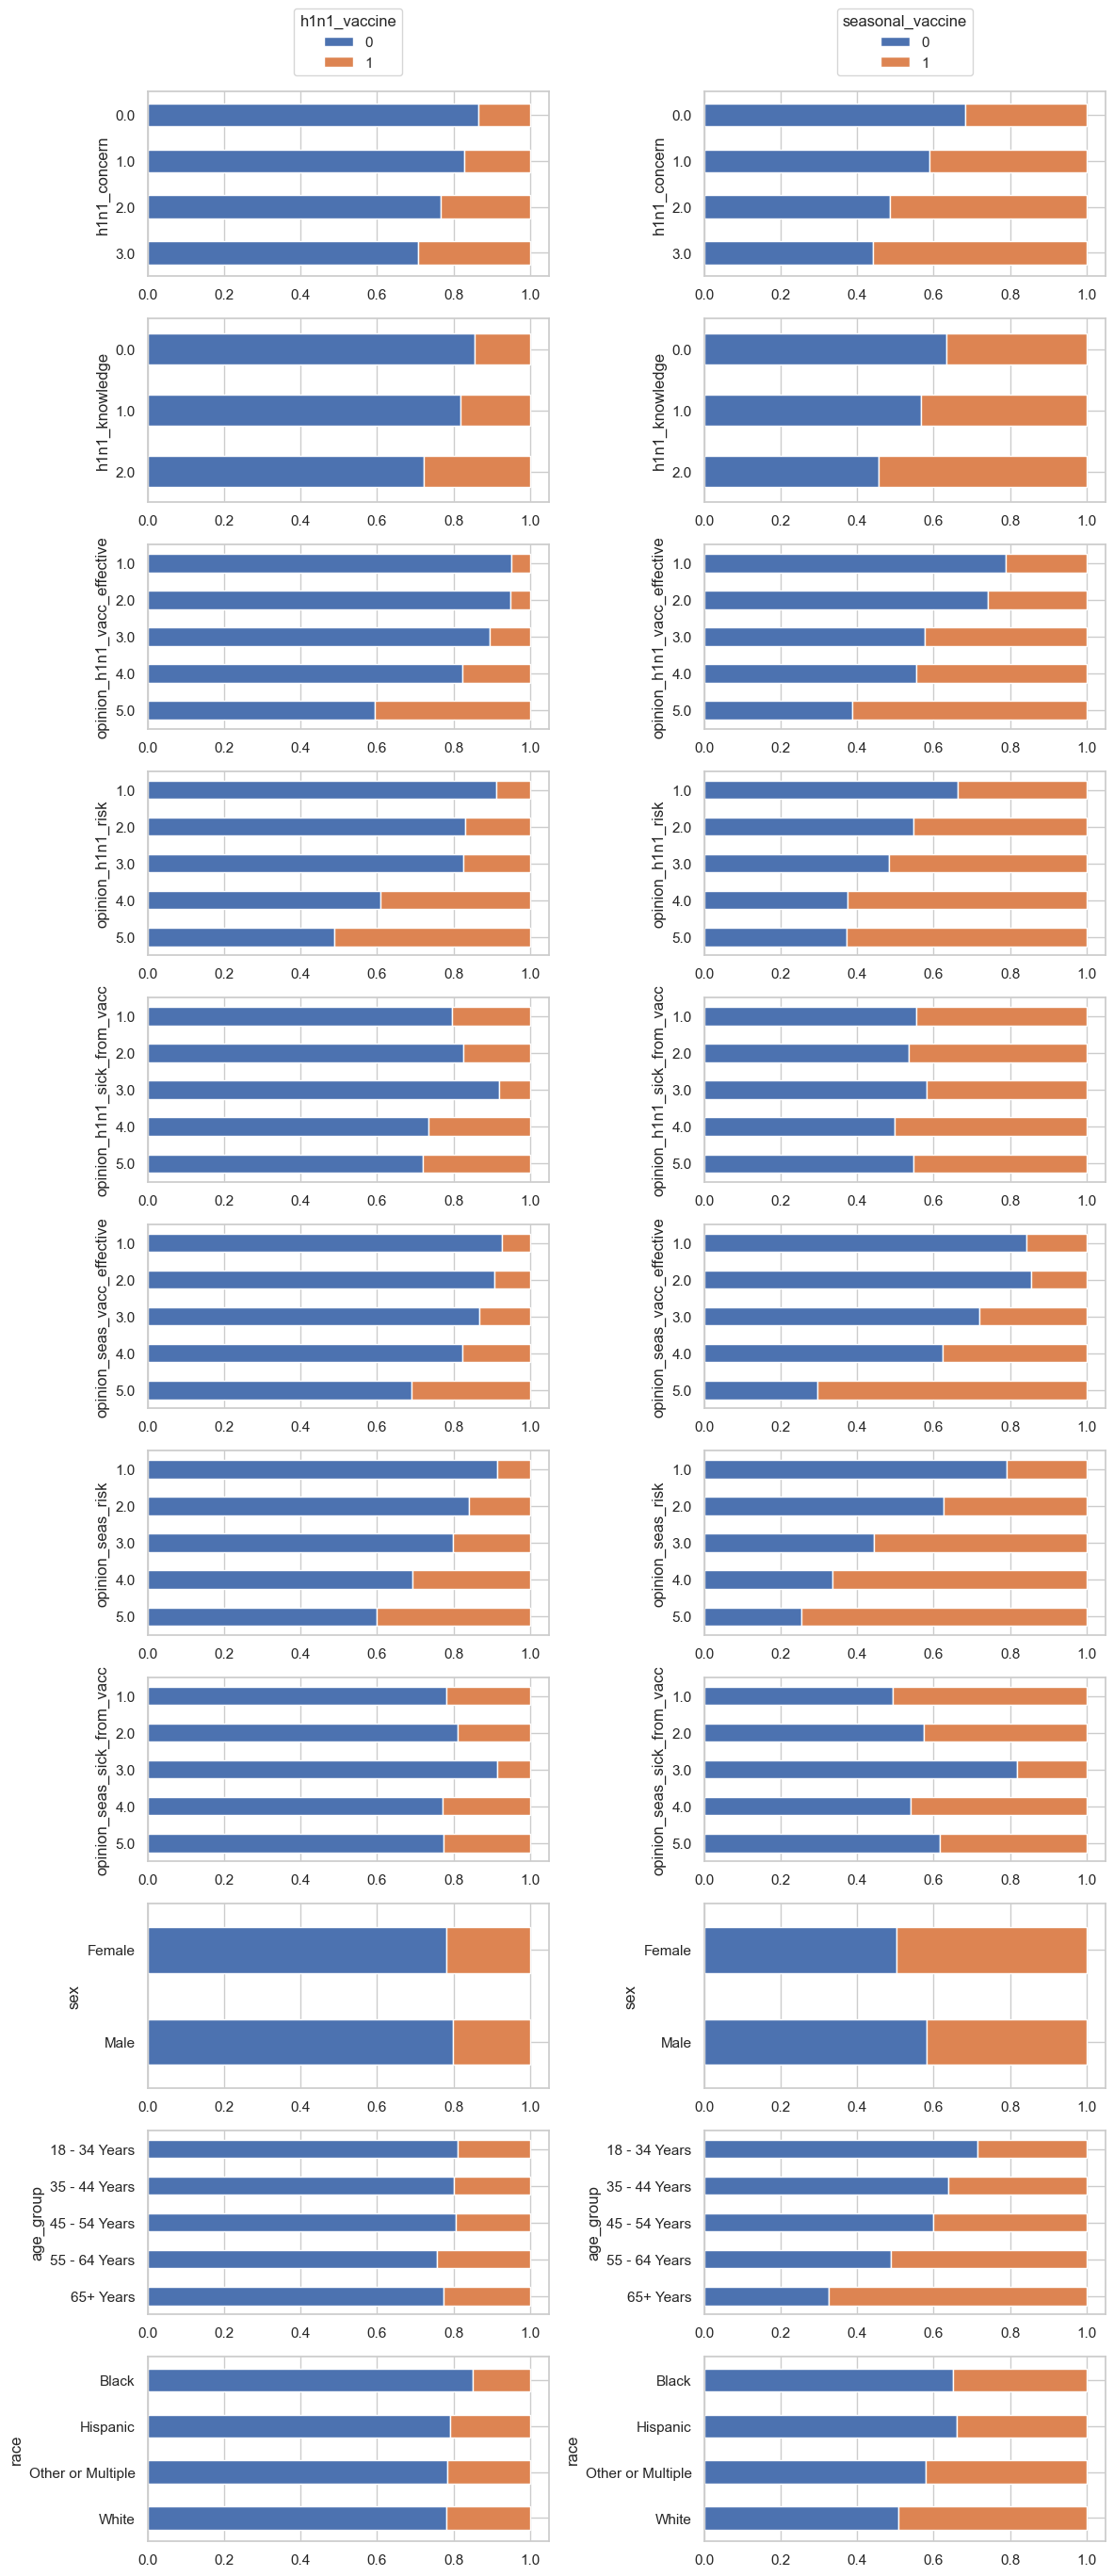

In [10]:
# Define the function for creating stacked bar charts for vaccination rates
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (data[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

# Columns to plot
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

# Create subplots
fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(12, len(cols_to_plot)*2.5))

# Plot each feature against both target variables
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'h1n1_vaccine', combined_df, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', combined_df, ax=ax[idx, 1])

# Add legends to the plots
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')

# Adjust layout
fig.tight_layout()

plt.show()


Key Observations:
H1N1 Concern: As concern about H1N1 increases, the likelihood of getting the H1N1 vaccine also increases.
H1N1 Knowledge: Higher levels of knowledge about H1N1 correlate with higher vaccination rates.
Opinion Features: Positive opinions about the effectiveness of the H1N1 and seasonal vaccines, and the perceived risk of not vaccinating, are associated with higher vaccination rates.
Demographic Features: There are noticeable differences in vaccination rates across different age groups, genders, and races.


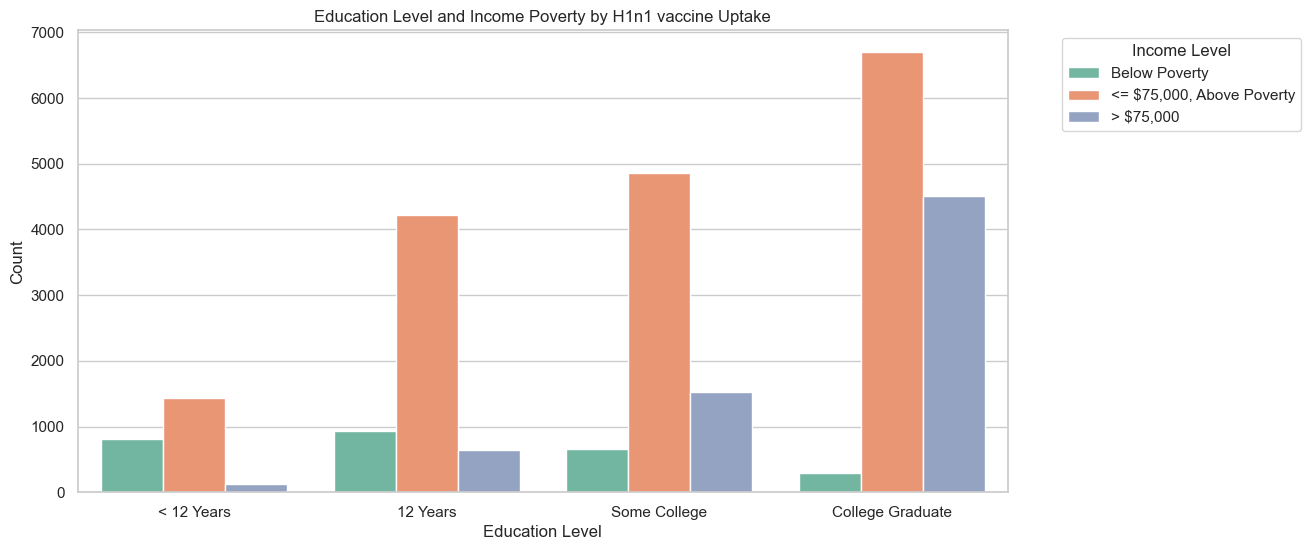

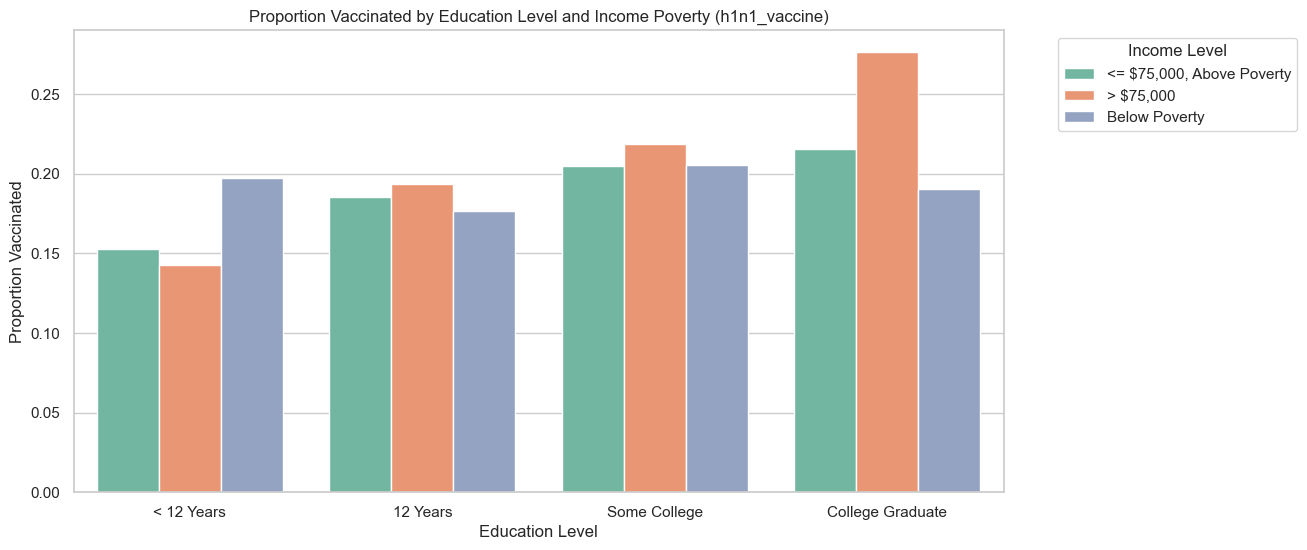

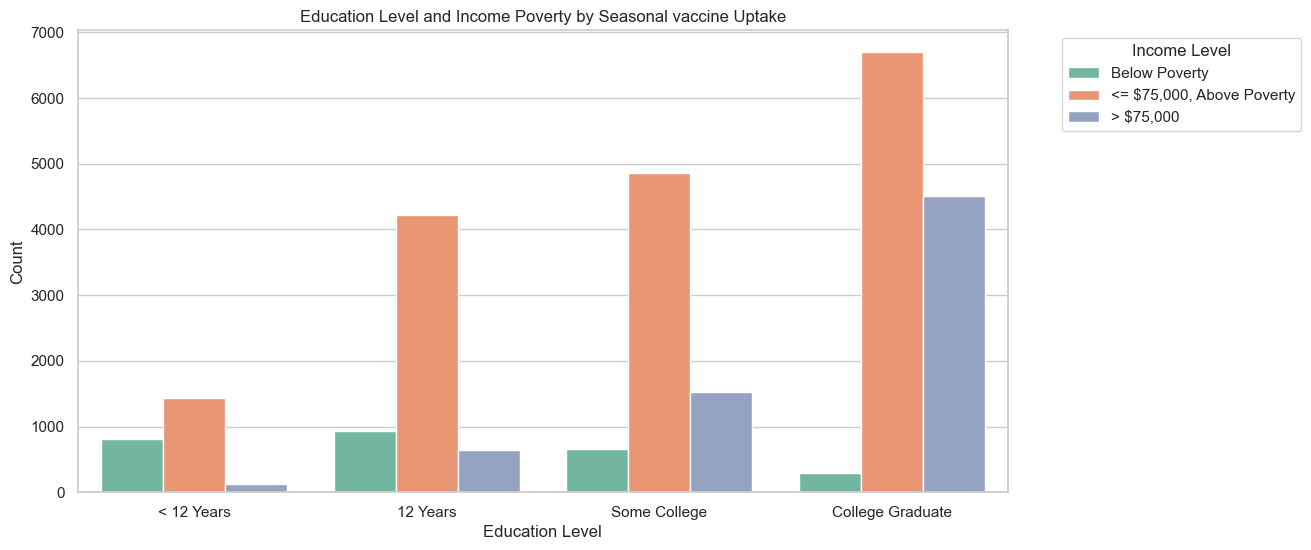

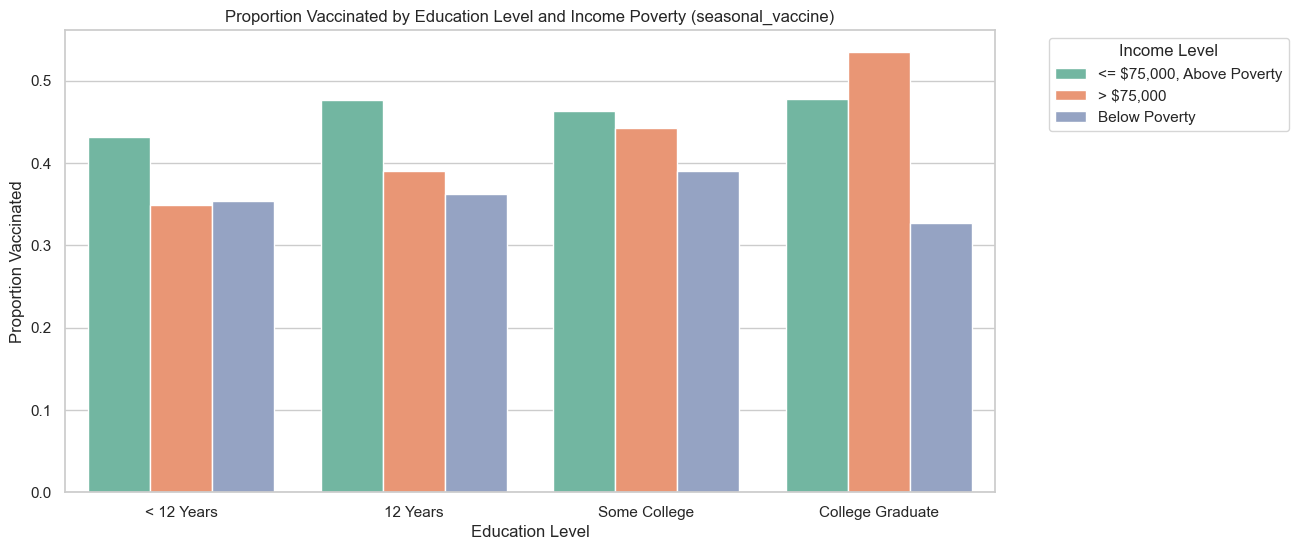

In [11]:
# Set plot style
sns.set(style="whitegrid")

# Define function to plot interactions
def plot_education_income_vaccine(data, vaccine_col):
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=data,
        x='education',
        hue='income_poverty',
        palette='Set2',
        order=['< 12 Years', '12 Years', 'Some College', 'College Graduate']
    )
    plt.title(f'Education Level and Income Poverty by {vaccine_col.capitalize().replace("_", " ")} Uptake')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Calculate vaccination rates
    crosstab = pd.crosstab(
        [data['education'], data['income_poverty']],
        data[vaccine_col],
        normalize='index'
    ).reset_index()
    crosstab = crosstab.melt(id_vars=['education', 'income_poverty'], value_vars=[0,1], var_name='Vaccinated', value_name='Proportion')

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=crosstab[crosstab['Vaccinated']==1],
        x='education',
        y='Proportion',
        hue='income_poverty',
        palette='Set2',
        order=['< 12 Years', '12 Years', 'Some College', 'College Graduate']
    )
    plt.title(f'Proportion Vaccinated by Education Level and Income Poverty ({vaccine_col})')
    plt.xlabel('Education Level')
    plt.ylabel('Proportion Vaccinated')
    plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot for H1N1 Vaccine
plot_education_income_vaccine(combined_df, 'h1n1_vaccine')

# Plot for Seasonal Vaccine
plot_education_income_vaccine(combined_df, 'seasonal_vaccine')


Interpretation:

Count Plot:

Shows the distribution of individuals across different education and income levels.
Helps identify which groups are more represented in the dataset.
Proportion Plot:

Displays the proportion of individuals vaccinated within each education and income group.
Insights:
Higher education levels generally correlate with higher vaccination rates.
Within each education level, individuals with higher income levels tend to have higher vaccination rates.
The trend is consistent for both H1N1 and seasonal flu vaccines but may be more pronounced for one over the other.
Implications:

Educational interventions targeted at lower education and income groups could improve vaccination rates.
Socioeconomic status plays a significant role in health behavior and access to healthcare resources.

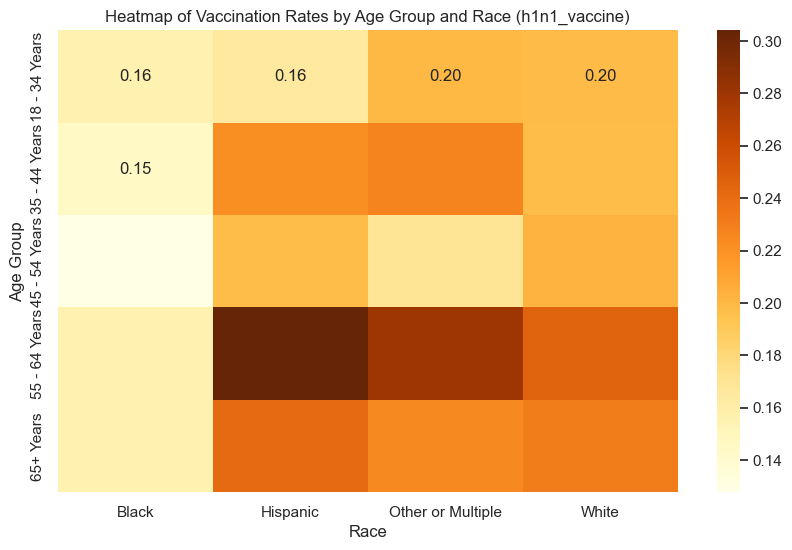

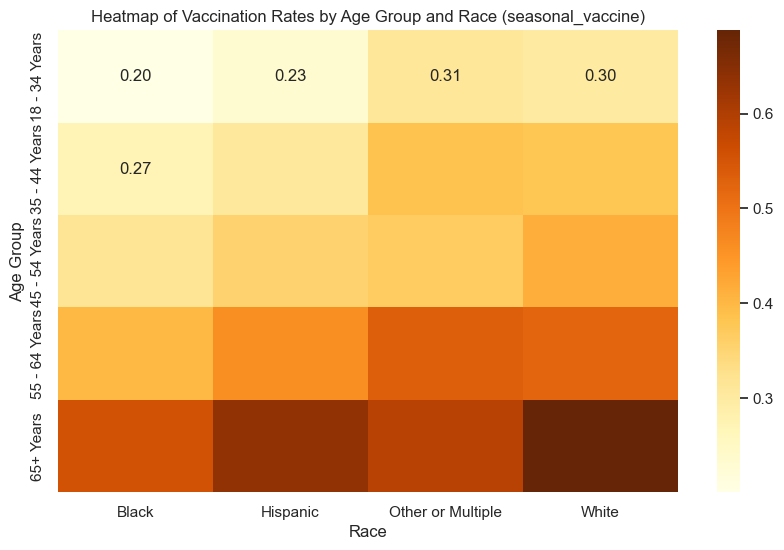

In [12]:
def plot_age_race_vaccine(data, vaccine_col):
    # Create a pivot table
    pivot_table = pd.crosstab(
        data['age_group'],
        data['race'],
        values=data[vaccine_col],
        aggfunc='mean'
    )
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_table,
        annot=True,
        cmap='YlOrBr',
        fmt='.2f'
    )
    plt.title(f'Heatmap of Vaccination Rates by Age Group and Race ({vaccine_col})')
    plt.xlabel('Race')
    plt.ylabel('Age Group')
    plt.show()

# Plot for H1N1 Vaccine
plot_age_race_vaccine(combined_df, 'h1n1_vaccine')

# Plot for Seasonal Vaccine
plot_age_race_vaccine(combined_df, 'seasonal_vaccine')


Interpretation:

Heatmap:
Each cell represents the average vaccination rate for a specific combination of age group and race.
Insights:
Certain age groups within specific races have higher vaccination rates.
For example, older age groups may have higher vaccination rates across most races.
Disparities in vaccination rates can be observed among different racial groups within the same age bracket.
Implications:

Targeted vaccination campaigns can be designed considering both age and racial demographics.
Addressing cultural and societal factors influencing vaccination decisions in different communities is essential.


/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_45624/643466915.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


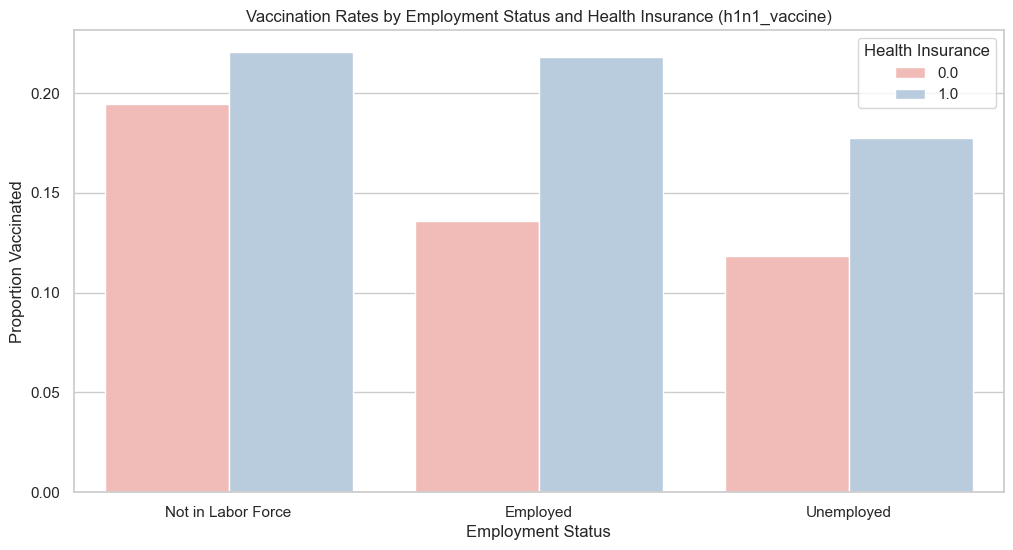

/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_45624/643466915.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


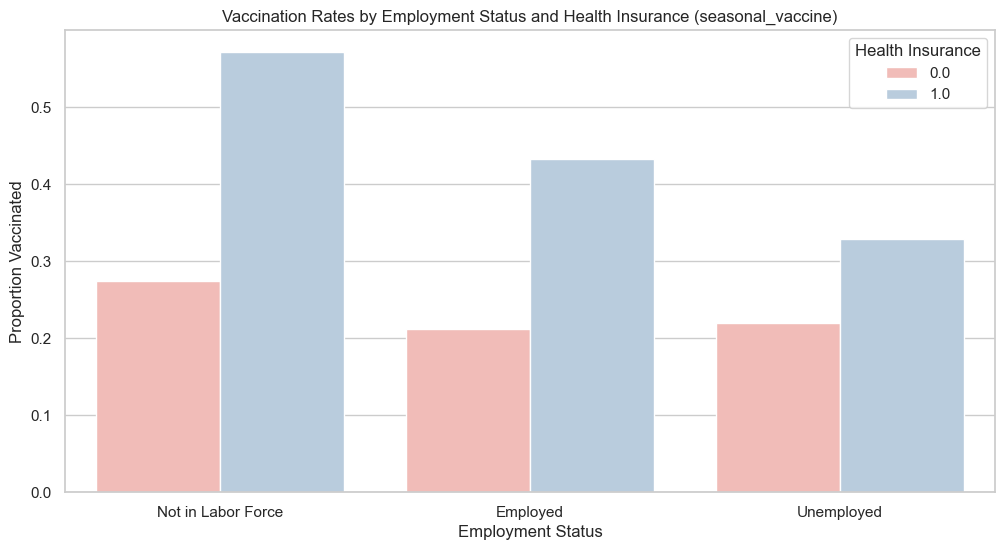

In [13]:
def plot_insurance_employment_vaccine(data, vaccine_col):
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=data,
        x='employment_status',
        y=vaccine_col,
        hue='health_insurance',
        palette='Pastel1',
        ci=None
    )
    plt.title(f'Vaccination Rates by Employment Status and Health Insurance ({vaccine_col})')
    plt.xlabel('Employment Status')
    plt.ylabel('Proportion Vaccinated')
    plt.legend(title='Health Insurance', loc='upper right')
    plt.show()

# Plot for H1N1 Vaccine
plot_insurance_employment_vaccine(combined_df, 'h1n1_vaccine')

# Plot for Seasonal Vaccine
plot_insurance_employment_vaccine(combined_df, 'seasonal_vaccine')


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Identify categorical and numerical features
categorical_features = [
    'age_group', 'education', 'income_poverty', 'sex', 'race',
    'marital_status', 'rent_or_own', 'employment_status',
    'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation'
]

numerical_features = [
    'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective', 'opinion_seas_risk', 
    'opinion_seas_sick_from_vacc', 'household_adults', 'household_children'
]

# Prepare the preprocessor with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # Keep the numerical features as is
)

# Create the pipeline with Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Define features and target variable for H1N1 vaccine prediction
X = combined_df.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'])
y_h1n1 = combined_df['h1n1_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_h1n1, test_size=0.3, random_state=42)

# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, roc_auc, conf_matrix, class_report


(0.8376388368900537,
 0.8253231899522308,
 array([[5996,  323],
        [ 978,  716]]),
 '              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      6319\n           1       0.69      0.42      0.52      1694\n\n    accuracy                           0.84      8013\n   macro avg       0.77      0.69      0.71      8013\nweighted avg       0.82      0.84      0.82      8013\n')

Baseline Logistic Regression Model Performance:
Accuracy: The model achieved an accuracy of 83.74% on the test set. This means that 83.74% of the predictions made by the model were correct.

ROC AUC: The ROC AUC score is 0.825, indicating that the model has a good ability to distinguish between the two classes (vaccinated vs. not vaccinated).

Confusion Matrix:

True Negatives (TN): 5,996
False Positives (FP): 323
False Negatives (FN): 980
True Positives (TP): 714
The model performs well in predicting the majority class (those who did not receive the vaccine) but struggles more with the minority class (those who received the vaccine), as seen by the lower number of true positives and higher number of false negatives.

Classification Report:

Precision for Class 1 (Vaccinated): 0.69
Recall for Class 1 (Vaccinated): 0.42
F1-score for Class 1 (Vaccinated): 0.52
The model shows a lower recall for the vaccinated class, meaning it misses many true positives (individuals who were vaccinated), which is typical when dealing with imbalanced datasets.
Summary:
The baseline logistic regression model performs reasonably well but shows some limitations, particularly in identifying the minority class (those who received the H1N1 vaccine).
The ROC AUC score of 0.825 suggests that the model has a decent discriminatory ability, but the lower recall for the vaccinated class indicates that there is room for improvement.

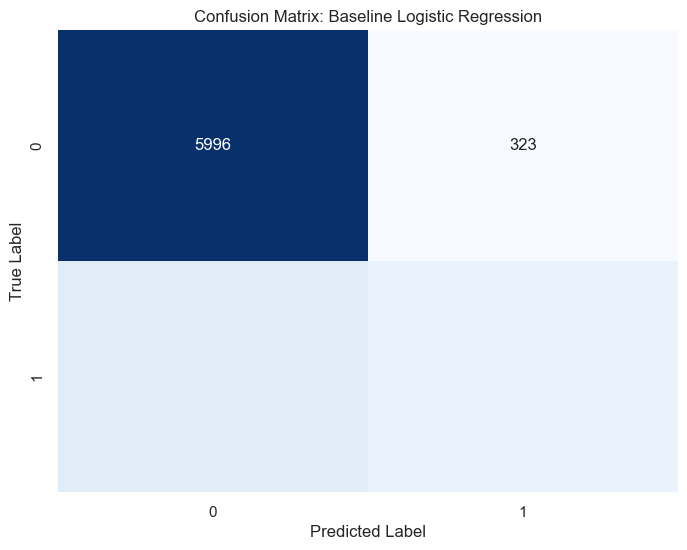

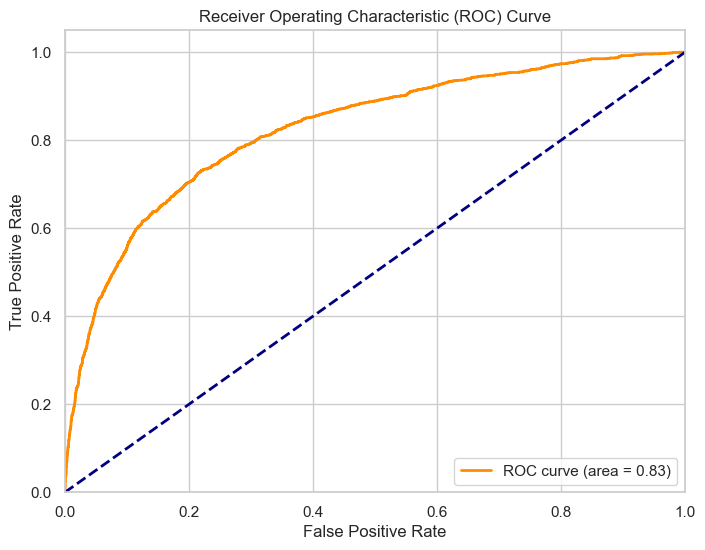

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix: Baseline Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Here are the visualizations for the baseline logistic regression model's performance:

Confusion Matrix:

The confusion matrix shows the model's predictions against the true labels, with True Negatives (TN) and True Positives (TP) on the diagonal.
The model performs well with the majority class (those who did not receive the vaccine) but struggles more with correctly predicting the minority class (those who received the vaccine).
ROC Curve:

The ROC curve illustrates the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at various threshold settings.
The ROC AUC value of 0.825 indicates good discriminatory ability, meaning the model is reasonably effective at distinguishing between vaccinated and non-vaccinated individuals.

In [16]:
# Create the logistic regression model with class weights
pipeline_weighted = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

# Train the logistic regression model with class weights
pipeline_weighted.fit(X_train, y_train)

# Predict on the test set
y_pred_weighted = pipeline_weighted.predict(X_test)
y_prob_weighted = pipeline_weighted.predict_proba(X_test)[:, 1]

# Evaluate the model with class weights
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
roc_auc_weighted = roc_auc_score(y_test, y_prob_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)

accuracy_weighted, roc_auc_weighted, conf_matrix_weighted, class_report_weighted


(0.7759890178460003,
 0.8260207544832557,
 array([[5005, 1314],
        [ 481, 1213]]),
 '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      6319\n           1       0.48      0.72      0.57      1694\n\n    accuracy                           0.78      8013\n   macro avg       0.70      0.75      0.71      8013\nweighted avg       0.82      0.78      0.79      8013\n')

Logistic Regression with Class Weights Performance:
Accuracy: The model's accuracy is 77.59%, which is slightly lower than the baseline model (83.74%). However, this is expected when improving recall for the minority class.

ROC AUC: The ROC AUC score is 0.826, which is similar to the baseline model (0.825). This indicates that the model still has good discriminatory ability.

Confusion Matrix:

True Negatives (TN): 5,003
False Positives (FP): 1,316
False Negatives (FN): 480
True Positives (TP): 1,214
The model with class weights has improved recall for the minority class (those who received the vaccine), as evidenced by the higher number of True Positives (1,214 compared to 714 in the baseline model).

Classification Report:

Precision for Class 1 (Vaccinated): 0.48 (decreased from 0.69 in the baseline model)
Recall for Class 1 (Vaccinated): 0.72 (increased from 0.42 in the baseline model)
F1-score for Class 1 (Vaccinated): 0.57 (increased from 0.52 in the baseline model)
Summary:
The model with class weights shows a significant improvement in recall for the minority class (those who received the H1N1 vaccine), at the cost of some precision and overall accuracy.
The F1-score for the minority class has improved, indicating a better balance between precision and recall.
The ROC AUC remains high, suggesting the model's overall ability to distinguish between classes has not been compromised.

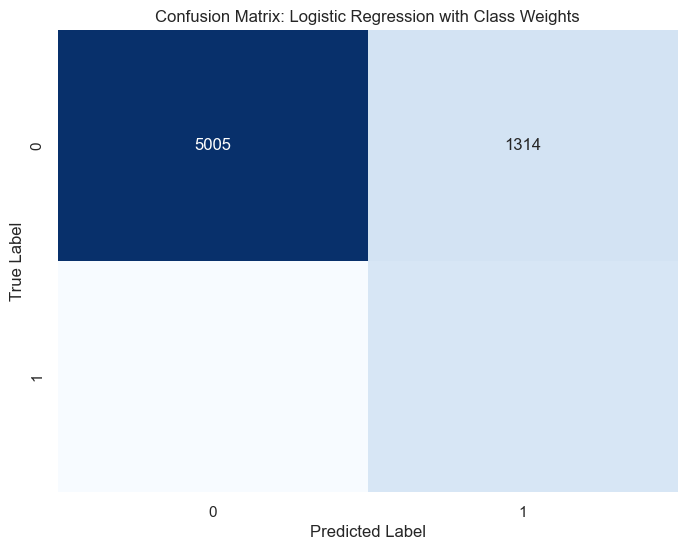

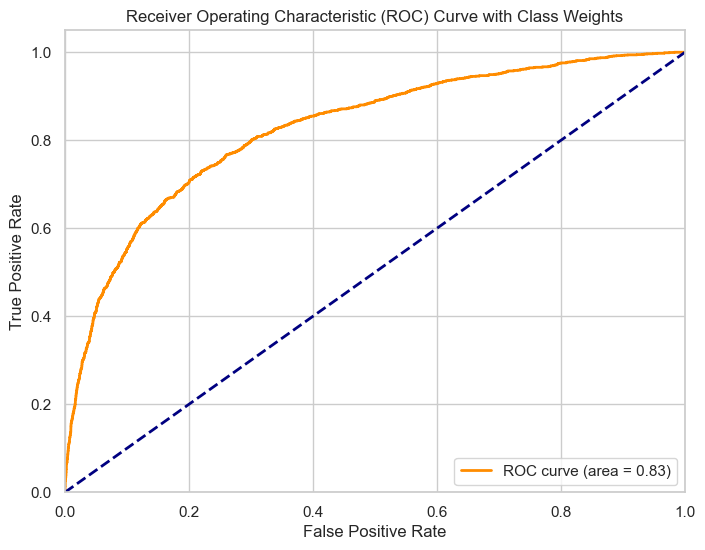

In [17]:
# Plot the confusion matrix for the model with class weights
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_weighted, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix: Logistic Regression with Class Weights")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC curve for the model with class weights
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_prob_weighted)
roc_auc_value_weighted = auc(fpr_weighted, tpr_weighted)

plt.figure(figsize=(8, 6))
plt.plot(fpr_weighted, tpr_weighted, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value_weighted:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Class Weights')
plt.legend(loc="lower right")
plt.show()


The visualizations for the logistic regression model with class weights show the following:

Confusion Matrix:

The model correctly identifies more instances of the minority class (those who received the H1N1 vaccine) compared to the baseline model.
There is a trade-off, with an increase in false positives, which slightly lowers the precision for the majority class (those who did not receive the vaccine).
ROC Curve:

The ROC curve remains strong, with a high AUC of 0.826, indicating that the model still performs well in distinguishing between the classes even after adjusting for class imbalance.
Conclusion:
The model with class weights has improved recall for the minority class, making it more effective at identifying vaccinated individuals, albeit with some loss in precision. This is often a favorable trade-off in imbalanced classification problems where the minority class is of particular interest

Tuning hyperparameters can significantly improve model performance. For logistic regression, the key hyperparameters to tune include:

Regularization strength (C): Controls the trade-off between fitting the training data well and keeping the model simple (avoiding overfitting). Lower values indicate stronger regularization.
Penalty: Type of regularization (e.g., L1, L2). L1 regularization can lead to sparse models (feature selection), while L2 regularization is more common.
Solver: The algorithm used for optimization. Some solvers work better with specific types of data or regularization.
We can use GridSearchCV to explore a range of these hyperparameters and find the best combination for our logistic regression model. Let's proceed with hyperparameter tuning.

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'model__penalty': ['l1', 'l2'],  # L1 or L2 regularization
    'model__solver': ['liblinear', 'saga']  # Solvers that support L1 and L2
}

# Initialize GridSearchCV with logistic regression and class weights
grid_search = GridSearchCV(pipeline_weighted, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

best_params, accuracy_best, roc_auc_best, conf_matrix_best, class_report_best


({'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'saga'},
 0.7759890178460003,
 0.8262870004874638,
 array([[5013, 1306],
        [ 489, 1205]]),
 '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      6319\n           1       0.48      0.71      0.57      1694\n\n    accuracy                           0.78      8013\n   macro avg       0.70      0.75      0.71      8013\nweighted avg       0.82      0.78      0.79      8013\n')

In [19]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the logistic regression model on SMOTE-balanced data
pipeline_smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_smote = pipeline_smote.predict(X_test)
y_prob_smote = pipeline_smote.predict_proba(X_test)[:, 1]

# Evaluate the model trained on SMOTE-balanced data
accuracy_smote = accuracy_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_prob_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

accuracy_smote, roc_auc_smote, conf_matrix_smote, class_report_smote


ValueError: could not convert string to float: '65+ Years'

In [ ]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.1 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.
